In [2]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
path = Path('data')
path

PosixPath('data')

#### Load learner if continuing from previous training

In [5]:
# learn = load_learner(path)

In [6]:
df = pd.read_csv(path/'clean.csv')
df.head()

,Unnamed: 0,itemid,title,Category,image_path
0,0,307504,beauty nyx sex bomb pallete natural palette,0,beauty_image/6b2e9cbb279ac95703348368aa65da09
1,1,461203,beauty etude house precious mineral any cushio...,1,beauty_image/20450222d857c9571ba8fa23bdedc8c9
2,2,3592295,beauty milani rose powder blush,2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9
3,3,4460167,beauty etude house baby sweet sugar powder,3,beauty_image/56987ae186e8a8e71fcc5a261ca485da
4,4,5853995,beauty bedak revlon color stay aqua mineral ma...,3,beauty_image/9c6968066ebab57588c2f757a240d8b9


In [6]:
tfms = get_transforms()

Set random seed to a constant so that results can be replicated.

Load csv, with images in 'image_path' column and attach '.jpg' suffix
Randomly choose 20% of dataset to be used as validation set and the rest as training set
Labels are in column 'Category'

In [7]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_clean.csv', folder='images', suffix='.jpg', cols='image_path')
       .random_split_by_pct(0.2)
       .label_from_df(cols='Category'))

We transform images to size 128 for first step of training

In [8]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

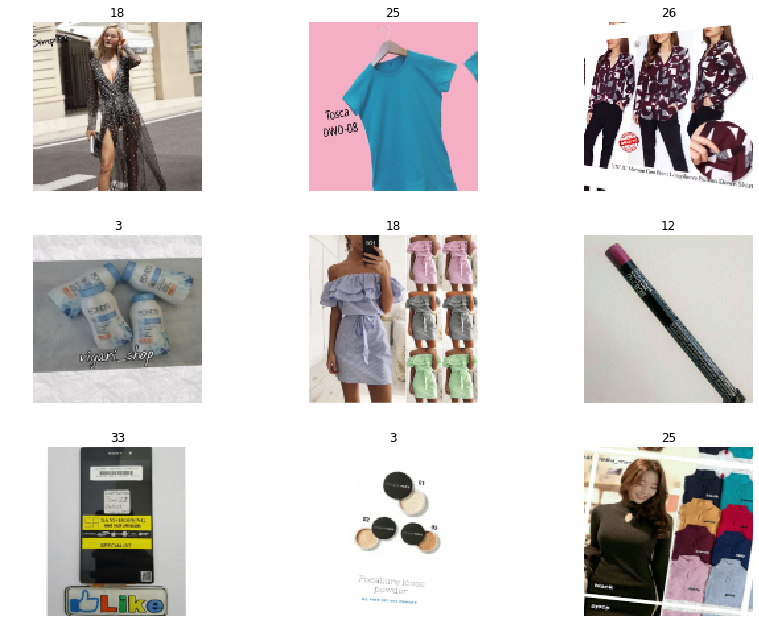

In [9]:
data.show_batch(rows=3, figsize=(12,9))

In [10]:
data.c, len(data.train_ds), len(data.valid_ds)

(58, 533292, 133323)

## Create model

In [11]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 6.31e-3

#### Train last layer only

In [ ]:
learn.fit_one_cycle(10, slice(lr))

In [ ]:
learn.save('stage-1-128-rn50')

In [ ]:
learn.load('stage-1-128-rn50');

#### Unfreeze all layers and train entire model

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, slice(1e-5, lr/5))

In [ ]:
learn.save('stage-2-128-rn50')

Increase image size to 256

In [11]:
learn.load('stage-2-128-rn50');

In [12]:
data = (src.transform(tfms, size=256)
        .databunch(bs=32).normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05


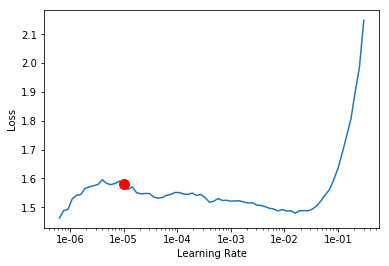

In [12]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [17]:
lr = 1e-3

In [14]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.265281,1.262327,0.398791
2,1.216724,1.216501,0.384097
3,1.203167,1.206583,0.381810
4,1.163392,1.201712,0.378599
5,1.169113,1.190565,0.376649
6,1.154416,1.190705,0.379057
7,1.136038,1.183278,0.374174
8,1.150828,1.181013,0.372359
9,1.123111,1.177392,0.371954
10,1.106852,1.177111,0.371616


In [15]:
learn.save('stage-1-256-rn50')

In [13]:
learn.load('stage-1-256-rn50');

In [14]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-05


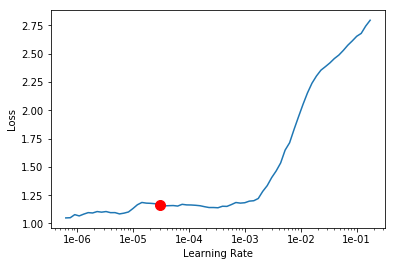

In [15]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5, slice(2e-5, lr/5))

epoch,train_loss,valid_loss,error_rate
1,1.217089,1.200242,0.378817
2,1.213604,1.183193,0.371969
3,1.198308,1.151650,0.362271
4,1.072655,1.120892,0.351815
5,0.943857,1.116021,0.348680


In [19]:
learn.save('stage-2-256-rn50')

In [20]:
learn.export()